<a href="https://colab.research.google.com/github/sleevetug/Eloise/blob/main/Copy_of_14_Sea_Levels_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea-Level predictor project

---


This is a freeCodeCamp project

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

---
### Exercise 1 - Load in the data 
---

Load in the sea-levels data and have a look, dont forget to check the numerical and technical summaries and get a feel for the dataset

In [83]:
import pandas as pd 

seaLevel_df = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv')
seaLevel_df.info()
display(seaLevel_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


---
### Exercise 2 - scatter plot 
Create a  scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.

*hint: try using inline*

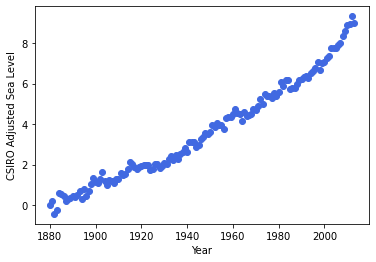

In [84]:
%matplotlib inline
from scipy.stats import linregress
import matplotlib.pyplot as plt


x = seaLevel_df['Year']
y = seaLevel_df['CSIRO Adjusted Sea Level']
plt.scatter(x, y, color = "royalblue")

plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

#regression = linregress(x, y)
#slope = regression.slope
#intercept = regression.intercept
#plt.plot(x, slope*x + intercept, color = "darkslategrey")
plt.show()

---
### Exercise 3 - Clean the data 

The column NOAA has null values in a number of rows.  Clean the data, producing a new dataframe. 


In [85]:
seaLevel_data = seaLevel_df.dropna(subset = ["NOAA Adjusted Sea Level"])
seaLevel_df.info()
print("\n")
seaLevel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 113 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      21 non-null     int64  
 1   CSIRO Adjusted Sea Level  21 non-null     float64
 2   Lower Error Bound         21 non-null     float64
 3   Upper Error Bound         21 non-null     float64
 4   NOAA Adjusted Sea L


### Exercise 3 - plot scatter graph for NOAA adjusted levels
---


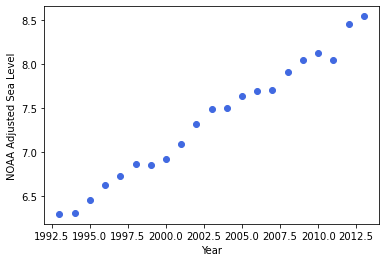

In [86]:
%matplotlib inline
from scipy.stats import linregress
import matplotlib.pyplot as plt


x = seaLevel_data['Year']
y = seaLevel_data['NOAA Adjusted Sea Level']
plt.scatter(x, y, color = "royalblue")

plt.xlabel('Year')
plt.ylabel('NOAA Adjusted Sea Level')

#regression = linregress(x, y)
#slope = regression.slope
#intercept = regression.intercept
#plt.plot(x, slope*x + intercept, color = "darkslategrey")
plt.show()

---
### Exercise 4 - plot line of best fit for CSIRO

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot. 
*   Make the line go through the year 2050 to predict the sea level rise in 2050.    

*(Hint:  use numpy to create an array from the first year to 2050 with an increment of 1)*

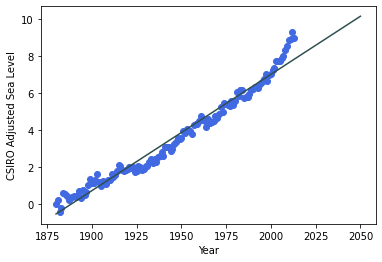

In [87]:
%matplotlib inline
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

x = seaLevel_df['Year']
y = seaLevel_df['CSIRO Adjusted Sea Level']
plt.scatter(x, y, color = "royalblue")

plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

year_array = np.arange(start=seaLevel_df['Year'].min(), stop=2051, step=1)

regression = linregress(x, y)
slope = regression.slope
intercept = regression.intercept
plt.plot(year_array, slope*year_array + intercept, color = "darkslategrey")

plt.show()

### Exercise 5 - plot line of best fit for NOAA
---

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot. 
*   Make the line go through the year 2030 to predict the sea level rise in 2030

*(Hint:  use numpy to create an array from the first year to 2030 with an increment of 1 AND remember to use noaa, which has NaN rows removed)*

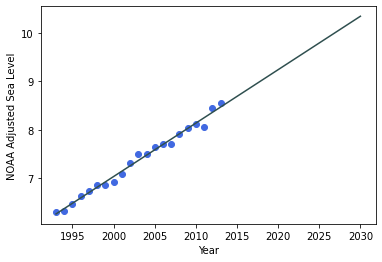

In [96]:
%matplotlib inline
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

x = seaLevel_data['Year']
y = seaLevel_data['NOAA Adjusted Sea Level']
plt.scatter(x, y, color = "royalblue")

plt.xlabel('Year')
plt.ylabel('NOAA Adjusted Sea Level')

year_array = np.arange(start=seaLevel_data['Year'].min(), stop=2031, step=1)

regression = linregress(x, y)
slope = regression.slope
intercept = regression.intercept
plt.plot(year_array, slope*year_array + intercept, color = "darkslategrey")
plt.show()


### Exercise 6 - shorter range (starting 2000)
---

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset and using the CSIRO adjusted levels. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

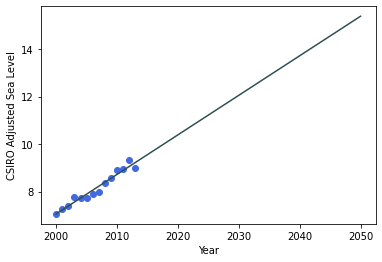

In [108]:
%matplotlib inline
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

year_2000 = seaLevel_df[seaLevel_df['Year'] >= 2000]

x = year_2000['Year']
y = year_2000['CSIRO Adjusted Sea Level']
plt.scatter(x, y, color = "royalblue")

plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

year_array = np.arange(start=2000, stop=2051, step=1)

regression = linregress(x, y)
slope = regression.slope
intercept = regression.intercept
plt.plot(year_array, slope*year_array + intercept, color = "darkslategrey")

plt.show()

### Exercise 6 - add labels to the axes  
---

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level"

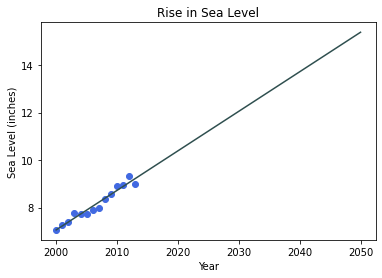

In [111]:
%matplotlib inline
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

year_2000 = seaLevel_df[seaLevel_df['Year'] >= 2000]

x = year_2000['Year']
y = year_2000['CSIRO Adjusted Sea Level']
plt.scatter(x, y, color = "royalblue")

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

year_array = np.arange(start=2000, stop=2051, step=1)

regression = linregress(x, y)
slope = regression.slope
intercept = regression.intercept
plt.plot(year_array, slope*year_array + intercept, color = "darkslategrey")

plt.show()